#**Team 11 Group Project**

#**Installing ISLP**


In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 24.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23

#**Imports**

In [47]:
import pandas as pd #Import for pandas
from sklearn.preprocessing import MinMaxScaler #Import for scaling using normalization
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table #Import for confusion table
from sklearn.model_selection import train_test_split #Import for splitting data into test and train
from sklearn.neighbors import KNeighborsClassifier as KNN #Import for KNN
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, classification_report #Import for evaluation metrics
import seaborn as sns #Import for seaborn
import matplotlib.pyplot as plt #Import for pyplot
import numpy as np #Import for numpy
from matplotlib.pyplot import subplots #Import for subplots
from sklearn.tree import (DecisionTreeClassifier as DTC,plot_tree) #Import for classifier, plot tree
from sklearn.cluster import KMeans #Import for K-means clustering
from sklearn.metrics import silhouette_score
import sklearn.model_selection as skm
from sklearn.decomposition import PCA #Import PCA class
from sklearn.cluster import AgglomerativeClustering #Import for hierarchical clustering
from scipy.cluster.hierarchy import(dendrogram, cut_tree, linkage) #Import for hierarchy
from ISLP.cluster import compute_linkage #Import for compute linkage

#**Loading Dataset**

In [48]:
#Reading data from the excel sheet in the specified path
dry_bean_data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
#Printing the data
dry_bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


#**Data Exploration**

In [49]:
#Finding number of samnples
total_samples = len(dry_bean_data)

#Finding number of features
total_features = len(dry_bean_data.columns)

#printing number of samples and features
print("Number of samples, before cleaning:", total_samples)
print("Number of features:", total_features)

Number of samples, before cleaning: 13611
Number of features: 17


In [50]:
#Describing the dataset, it provides in-depth data of each feature
print(dry_bean_data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13609.000000   
mean    53045.707369    855.283459       327.472588       202.272945   
std     29327.215648    214.289696       858.688485        44.973009   
min         9.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.313410       175.842829   
50%     44652.000000    794.941000       296.899313       192.437870   
75%     61332.000000    977.213000       376.504333       217.033886   
max    254616.000000   1985.370000    100000.000000       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13608.000000  13611.000000   13609.000000   13610.000000  13608.000000   
mean       1.583332      0.751585   53768.745536     253.068138      0.749728   
std        0.246631      0.121440   29779.126018      59.177529      0.049090   
min        1.024868      0.

In [51]:
#Finding the information about each feature including data type, non-null count, index, column name
print(dry_bean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13609 non-null  float64
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#**Data cleaning**

In [52]:
# Identifing null values and counting them
count_of_null_values = dry_bean_data.isnull().sum()
#Printing the count of null values in each column
print(count_of_null_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    2
AspectRation       3
Eccentricity       0
ConvexArea         2
EquivDiameter      1
Extent             3
Solidity           3
roundness          0
Compactness        0
ShapeFactor1       1
ShapeFactor2       1
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


In [53]:
# removing rows with null values
cleaned_dry_bean_data = dry_bean_data.dropna() #dropping the rows with null values using dropna
null_values_after_cleaning = cleaned_dry_bean_data.isnull().sum() #fetching the count after removing null values
print(null_values_after_cleaning) #printing the count

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [54]:
#re-indexing the dataset for consistancy
cleaned_dry_bean_data.reset_index(drop=True, inplace=True)

In [55]:
# Since area and perimeter cannot be zero, checking for that
rows_with_area_zero = cleaned_dry_bean_data[cleaned_dry_bean_data['Area'] == 0] #fetching rows with area value as zero
rows_with_perimeter_zero = cleaned_dry_bean_data[cleaned_dry_bean_data['Perimeter'] == 0.0] #fetching rows with perimeter value as zero

print(rows_with_area_zero)
print(rows_with_perimeter_zero)

Empty DataFrame
Columns: [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, Class]
Index: []
Empty DataFrame
Columns: [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, Class]
Index: []


#**Scaling using normalization**

In [56]:
# Separate numerical features from target variable
numerical_data = cleaned_dry_bean_data.drop('Class', axis=1)

# Initialize MinMaxScaler
min_max_scaler_initialization = MinMaxScaler()

# Scaling the numerical data using MinMaxScaler
scaled_data = min_max_scaler_initialization.fit_transform(numerical_data)

# Convert scaled data back to DataFrame
scaled_data_frame = pd.DataFrame(scaled_data, columns=numerical_data.columns)

# Concatenate scaled numerical data with the 'Class' column
final_data = pd.concat([scaled_data_frame, cleaned_dry_bean_data['Class']], axis=1)

#printing scaled data
final_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.111489,0.058574,0.000246,0.152142,0.122612,0.033827,0.109044,0.070804,0.671024,0.009831,0.934823,0.786733,0.593432,0.000323,0.750996,0.980620,SEKER
1,0.112821,0.077557,0.000170,0.178337,0.051577,0.019715,0.110780,0.073577,0.735504,0.009284,0.793138,0.903549,0.547447,0.000375,0.884987,0.974979,SEKER
2,0.115358,0.068035,0.000293,0.158190,0.131521,0.035147,0.112747,0.078816,0.716671,0.009930,0.914511,0.773514,0.582016,0.000310,0.736200,0.987196,SEKER
3,0.117825,0.082942,0.000270,0.177691,0.091623,0.028593,0.116675,0.083854,0.731365,0.008113,0.826871,0.829912,0.552408,0.000331,0.799846,0.893675,SEKER
4,0.118343,0.065313,0.000183,0.200679,0.025565,0.011730,0.115509,0.084906,0.700538,0.010119,0.988408,0.951583,0.510741,0.000388,0.941770,0.989116,SEKER


In [57]:
print(final_data.info()) #printing the information after removing null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13595 entries, 0 to 13594
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13595 non-null  float64
 1   Perimeter        13595 non-null  float64
 2   MajorAxisLength  13595 non-null  float64
 3   MinorAxisLength  13595 non-null  float64
 4   AspectRation     13595 non-null  float64
 5   Eccentricity     13595 non-null  float64
 6   ConvexArea       13595 non-null  float64
 7   EquivDiameter    13595 non-null  float64
 8   Extent           13595 non-null  float64
 9   Solidity         13595 non-null  float64
 10  roundness        13595 non-null  float64
 11  Compactness      13595 non-null  float64
 12  ShapeFactor1     13595 non-null  float64
 13  ShapeFactor2     13595 non-null  float64
 14  ShapeFactor3     13595 non-null  float64
 15  ShapeFactor4     13595 non-null  float64
 16  Class            13595 non-null  object 
dtypes: float64(1

#**Exploratory Analysis**

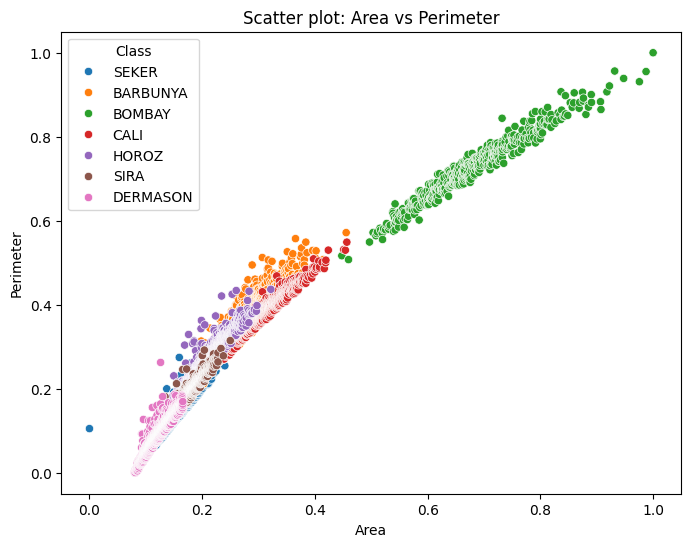

In [58]:
#plotting scatter plots to understand the relation between Area and Perimeter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='Area', y='Perimeter', hue='Class')
plt.title('Scatter plot: Area vs Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Class')
plt.show()

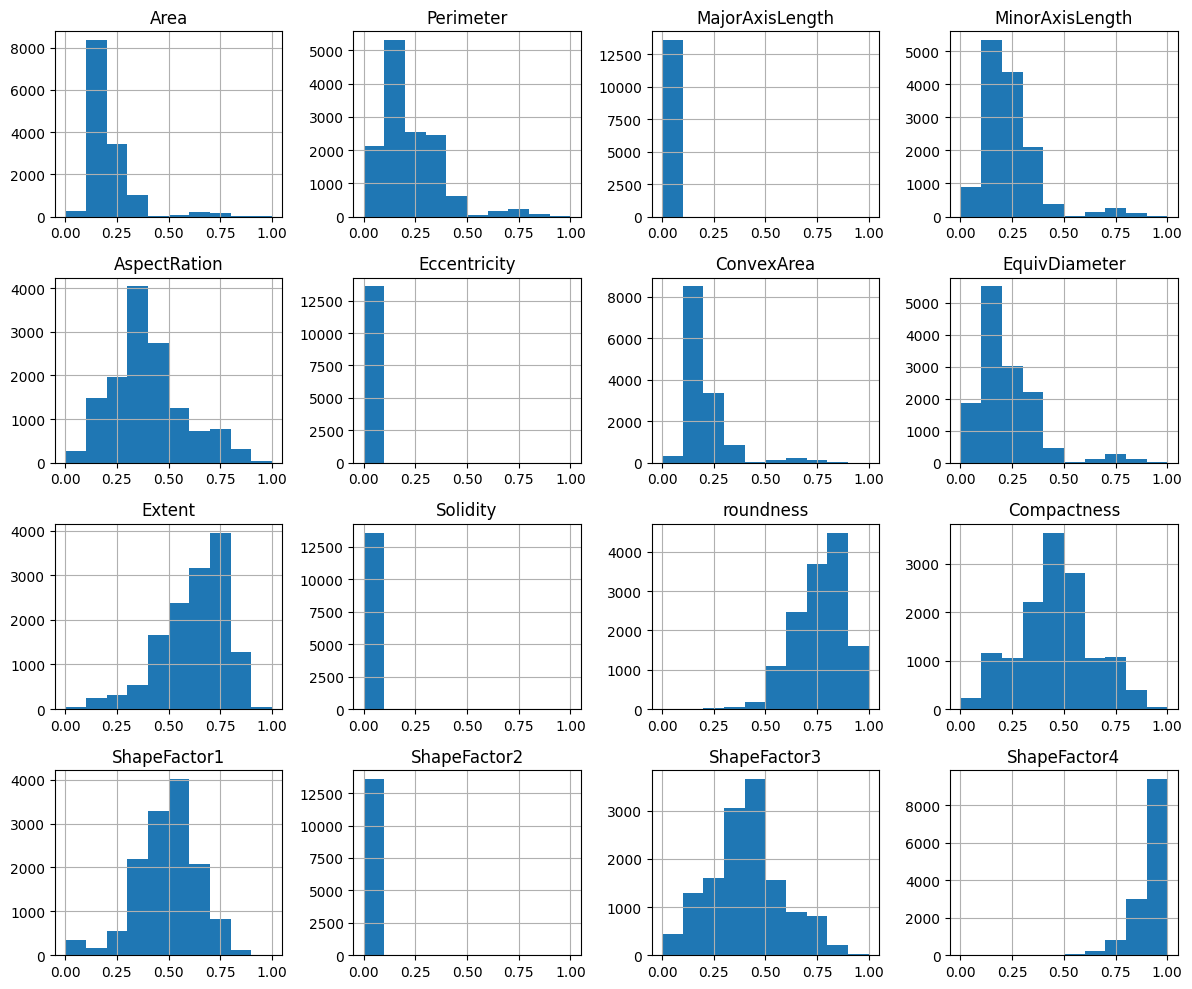

In [59]:
#Plotting histograms for the features
final_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

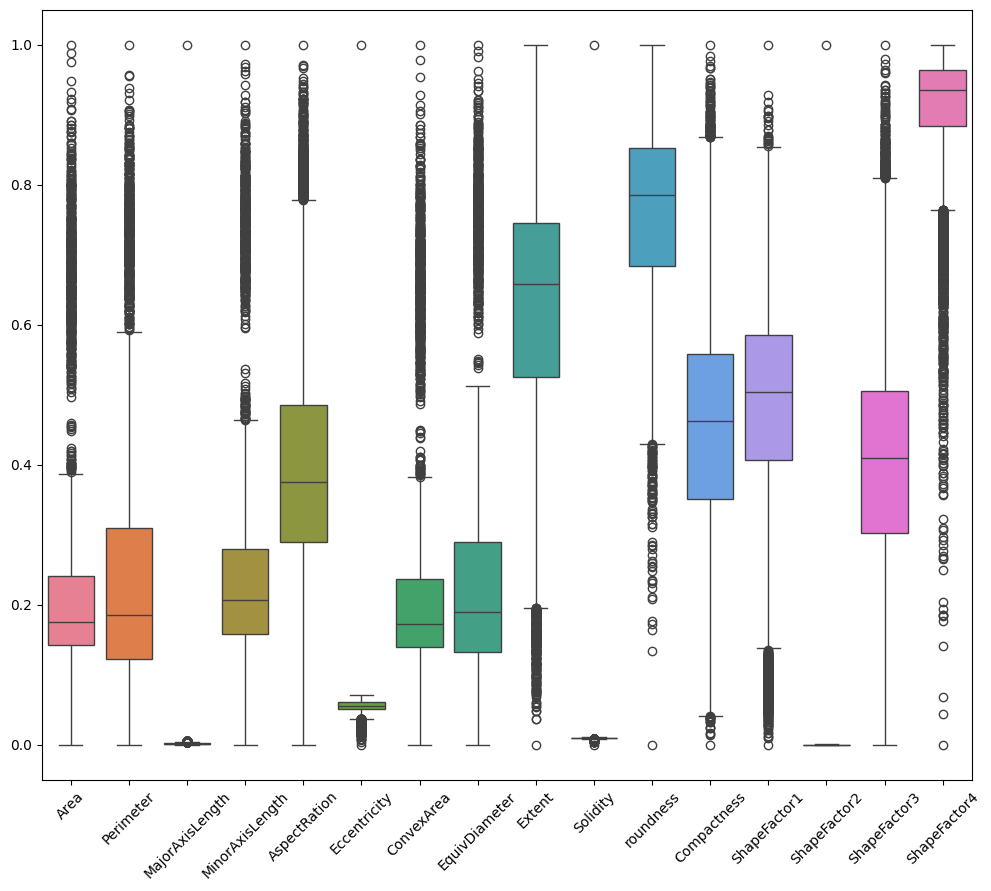

In [60]:
#plotting box plot
plt.figure(figsize=(12, 10))
sns.boxplot(data=final_data.drop(columns=['Class']))
plt.xticks(rotation=45)
plt.show()

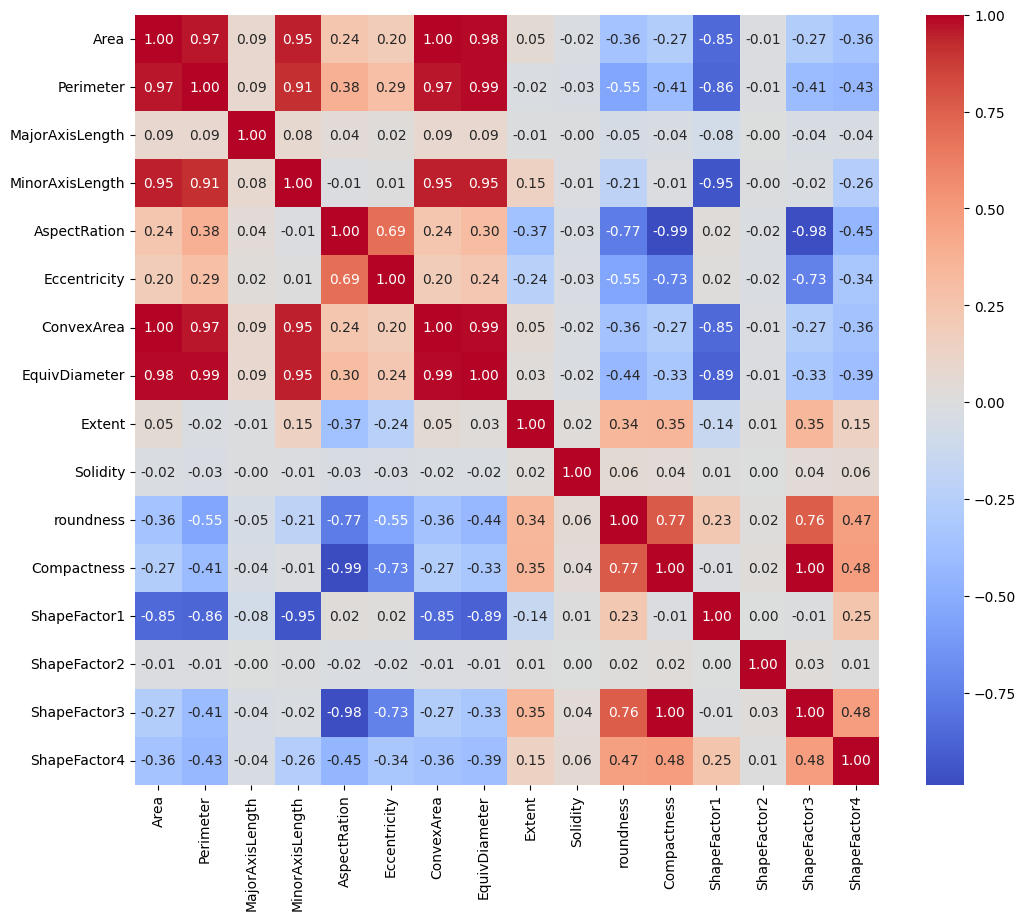

In [61]:
#Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(final_data.drop(columns=['Class']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#**Model Development**

#**Supervised Learning**

#**KNN**

In [62]:
predictors = final_data.columns.drop('Class') #Extracting predictors by dropping Class variable
design = MS(predictors) #Initializing model specification with predictor variables
X = design.fit_transform(final_data) #Fitiing the modeel specifcation to the data and transforming the data accordingly
y = final_data.Class #Extracting response variable Class from the data
knn_model = KNN(n_neighbors=3) #Creating instance of KNN
knn_model.fit(X,y) #Training the model
knn_pred = knn_model.predict(X)# Predicting X
confusion_table(knn_pred, y) #Generating confusion table

Truth,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Predicted,,,,,,,
BARBUNYA,1246,0,39,3,6,7,14
BOMBAY,0,522,0,0,0,0,0
CALI,48,0,1568,0,24,0,6
DERMASON,0,0,0,3378,14,36,162
HOROZ,3,0,15,3,1848,1,25
SEKER,6,0,2,36,0,1928,13
SIRA,19,0,6,126,36,39,2416


#**Evaluation Metrics of KNN**

In [63]:
#Calculation of accuracy score
accuracy = accuracy_score(y, knn_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9493196027951453


In [64]:
#Calculation of precision score
precision = precision_score(y, knn_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9494621116879883


In [65]:
#Calculation of recall score
recall = recall_score(y, knn_pred, average='weighted')
print("Recall:", recall)

Recall: 0.9493196027951453


In [66]:
#Calculation of F1-score
f1 = f1_score(y, knn_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.9493615940698005


In [67]:
#Calculation of confusion matrix
conf_matrix = confusion_matrix(y, knn_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1246    0   48    0    3    6   19]
 [   0  522    0    0    0    0    0]
 [  39    0 1568    0   15    2    6]
 [   3    0    0 3378    3   36  126]
 [   6    0   24   14 1848    0   36]
 [   7    0    0   36    1 1928   39]
 [  14    0    6  162   25   13 2416]]


In [68]:
#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

#**Logistic Regression**

In [69]:
logistic_reg_model = LogisticRegression(max_iter=1000) #Initializing Logistic Regression
logistic_reg_model.fit(X_train, y_train) #traing the model
y_pred = logistic_reg_model.predict(X_test) #Predicting X

In [70]:
accuracy = accuracy_score(y_test, y_pred) #Calculating accuracy and printing it
precision = precision_score(y_test, y_pred, average='weighted') #Calculating precision
recall = recall_score(y_test, y_pred, average='weighted') #Calculating recall
f1 = f1_score(y_test, y_pred, average='weighted') #Calculating f1-score

print("Accuracy Score:", accuracy)
print("Precision is ",precision)
print("Recall is ",recall)
print("F1-score is ",f1)

Accuracy Score: 0.9171365530767345
Precision is  0.9180869139600881
Recall is  0.9171365530767345
F1-score is  0.9172634538555279


#**LDA**

In [71]:
lda_model = LDA() #Initializing LDA
lda_model.fit(X_train,y_train) #training the model
lda_pred = lda_model.predict(X_test)#predicting X

In [72]:
precision = precision_score(y_test, lda_pred, average='weighted') #Calculating precision
recall = recall_score(y_test, lda_pred, average='weighted') #Calculating recall
f1 = f1_score(y_test, lda_pred, average='weighted') #Calculating f1-score

print("Accuracy Score:",accuracy_score(y_test, lda_pred))#Calculating accuracy and printing it
print("Precision is ",precision)
print("Recall is ",recall)
print("F1-score is ",f1)

Accuracy Score: 0.8923755822505516
Precision is  0.9082964252452407
Recall is  0.8923755822505516
F1-score is  0.8949668266916648


#**NB**

In [73]:
nb_model = NB()#Initializing Naive Bayes
nb_model.fit(X_train,y_train)#training the model
nb_pred = nb_model.predict(X_test)#predicting X

In [74]:
precision = precision_score(y_test, nb_pred, average='weighted') #Calculating precision
recall = recall_score(y_test, nb_pred, average='weighted') #Calculating recall
f1 = f1_score(y_test, nb_pred, average='weighted') #Calculating f1-score

print("Accuracy Score:",accuracy_score(y_test,nb_pred))#Calculating accuracy and printing it
print("Precision is ",precision)
print("Recall is ",recall)
print("F1-score is ",f1)

Accuracy Score: 0.8825692571708752
Precision is  0.8864818455005238
Recall is  0.8825692571708752
F1-score is  0.8827308408063843


#**Decision Tree**

In [75]:
mean_val=final_data['Area'].mean()
#Setting y as Class
Class=final_data.Class
print(Class)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13590    DERMASON
13591    DERMASON
13592    DERMASON
13593    DERMASON
13594    DERMASON
Name: Class, Length: 13595, dtype: object


In [76]:
tree_model=MS(final_data.columns.drop('Class'),intercept=False)
X= tree_model.fit_transform(final_data)
predictors=list(X.columns)
Y=Class

X_train,X_test,Y_train,Y_test =skm.train_test_split(X,Y,test_size=.3,random_state=19)

In [77]:
cdt_model=DTC(criterion='entropy',random_state=19,ccp_alpha=0.01) #creating desion tree, with cpp_alpha applying pruning
cdt_model.fit(X_train,Y_train) #Training using X and Y values
y_hat=cdt_model.predict(X_test)
print(cdt_model.tree_.n_leaves)

20


In [78]:
def show(model,feature_names):
  ax=subplots(figsize=(40,40))[1]
  plot_tree(model,feature_names=feature_names,ax=ax)

#**Decison Tree Plot**

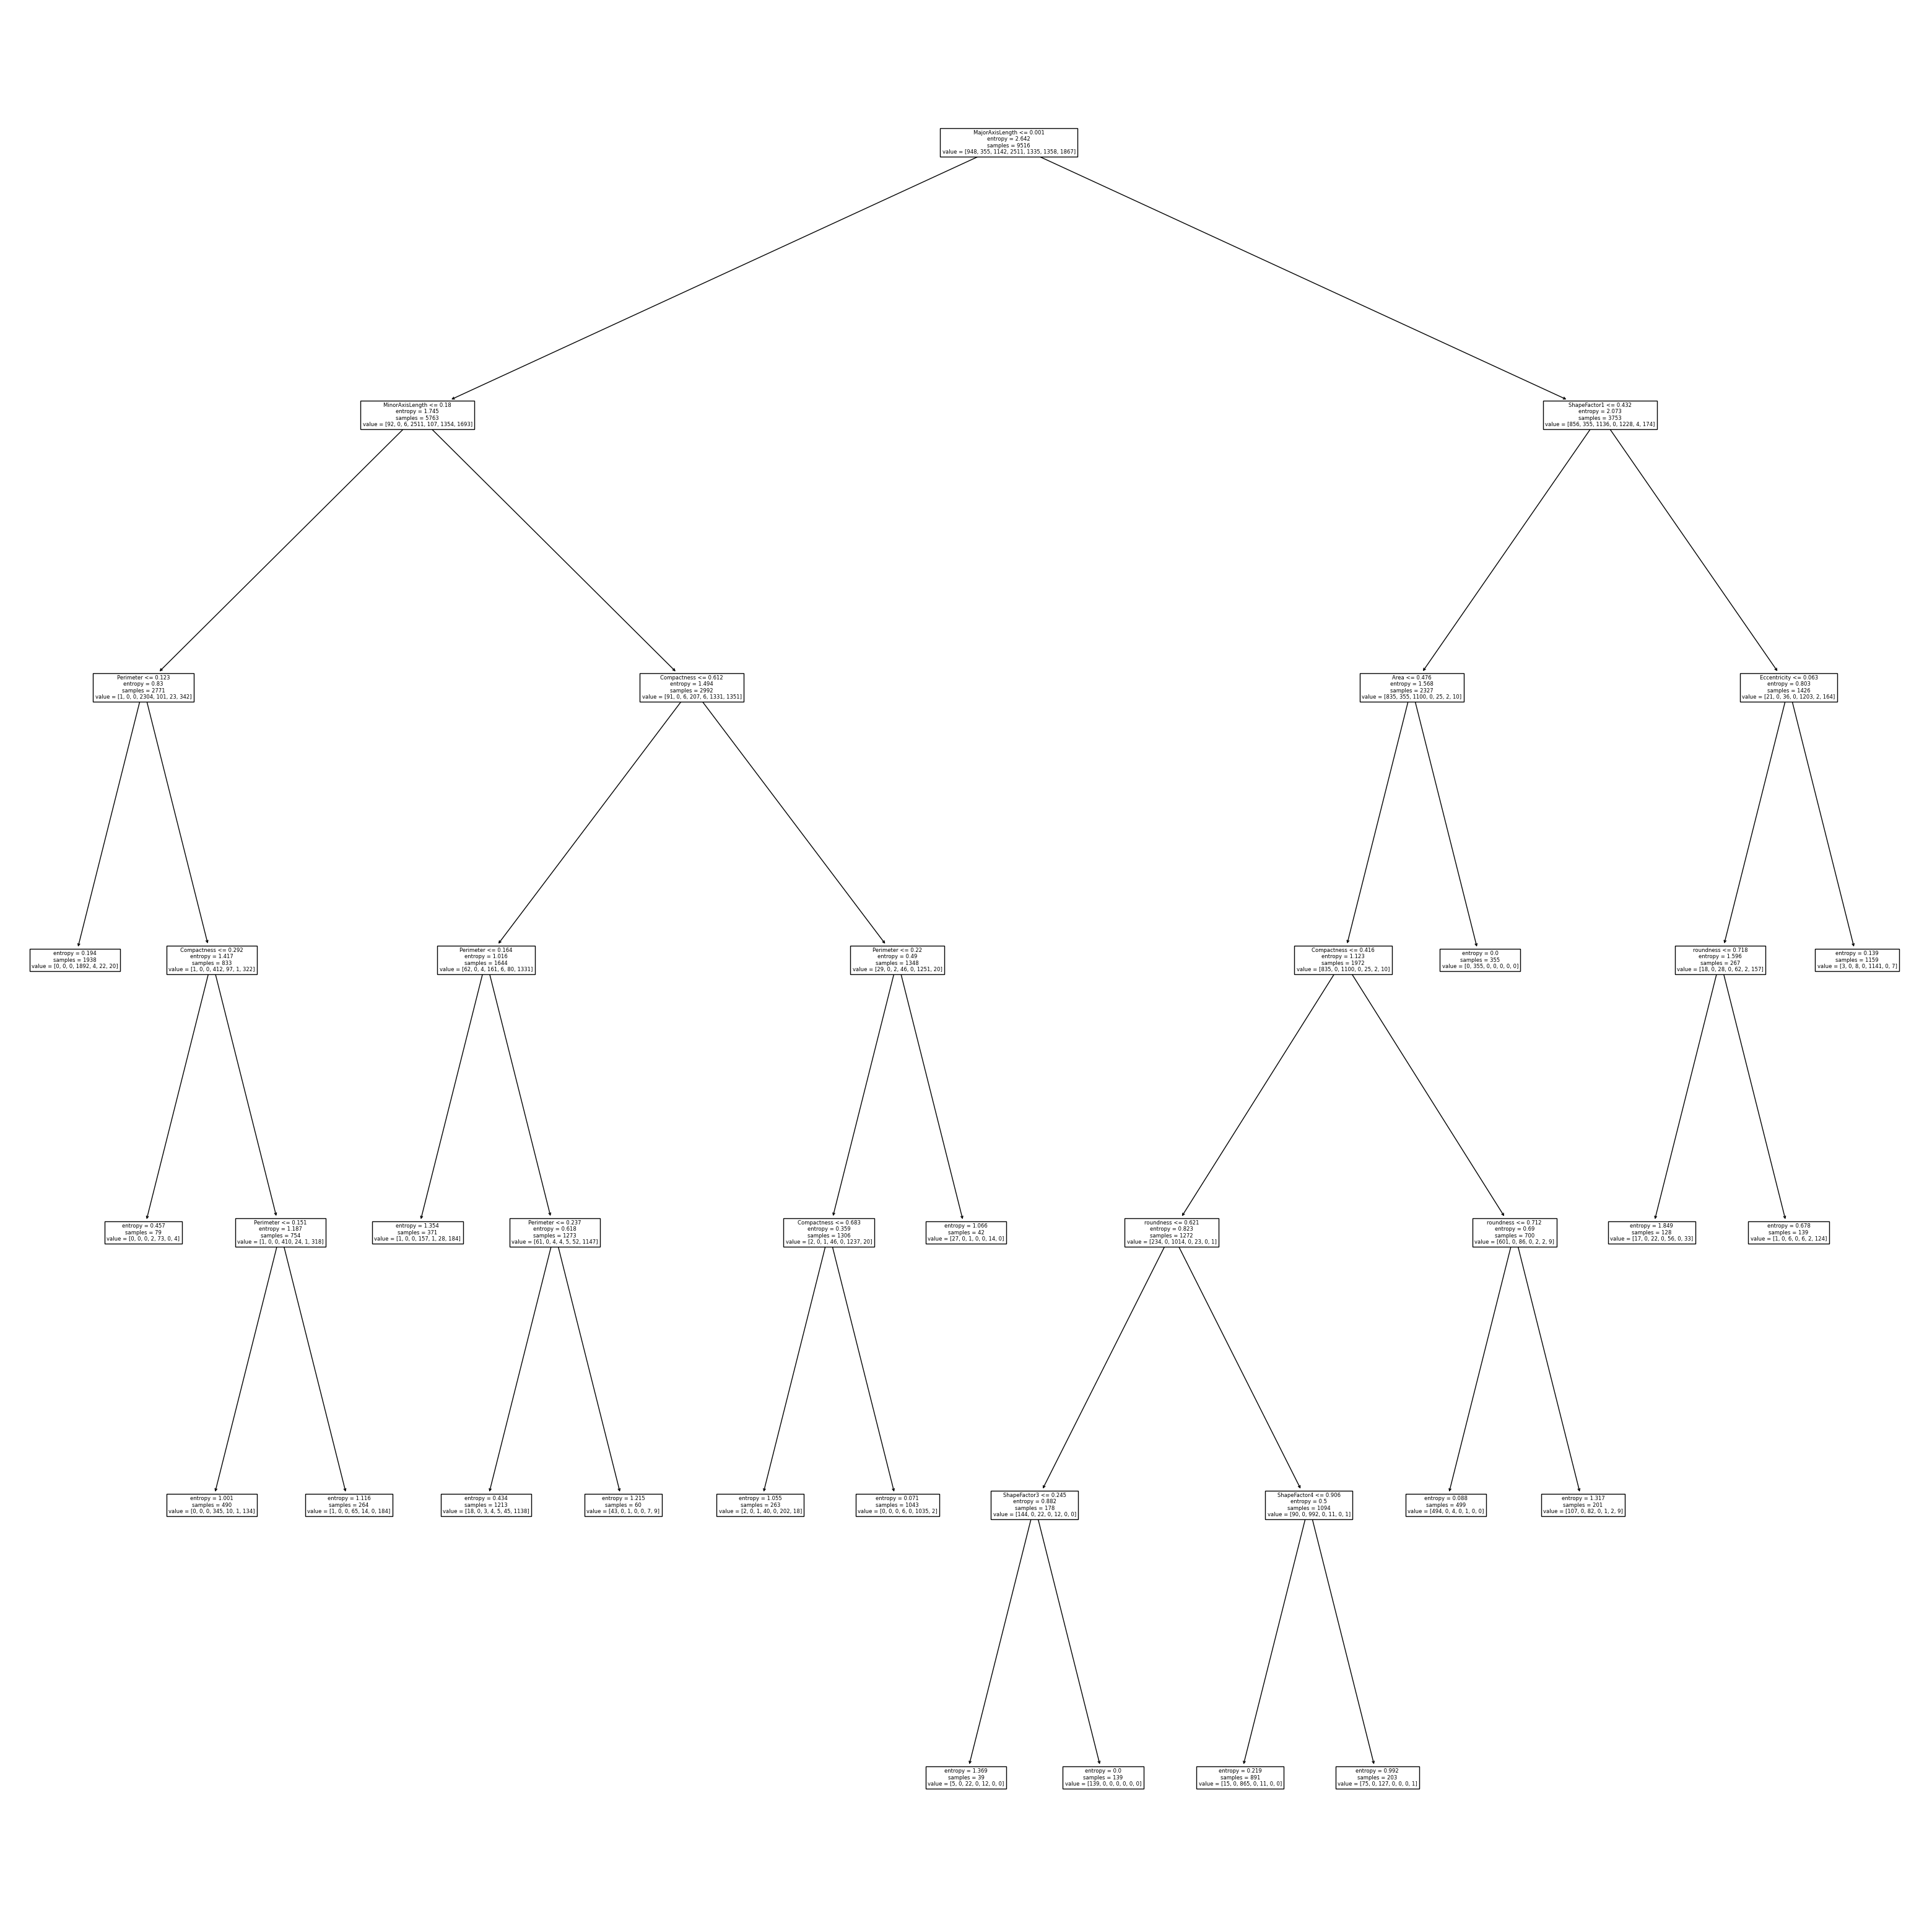

In [79]:
show(cdt_model,predictors)

In [80]:
print("Accuracy is ",accuracy_score(Y_test,y_hat))
cm = confusion_matrix(Y_test, y_hat)
precision = precision_score(Y_test, y_hat, average='weighted')
recall = recall_score(Y_test, y_hat, average='weighted')
f1 = f1_score(Y_test, y_hat, average='weighted')
print("Confusion Matrix is ",cm)
print("Precision is ",precision)
print("Recall is ",recall)
print("F1-score is ",f1)

Accuracy is  0.8972787447903898
Confusion Matrix is  [[314   0  41   0  10   1   8]
 [  2 165   0   0   0   0   0]
 [ 47   0 429   0   8   0   4]
 [  0   0   0 914   1  13 107]
 [  2   0  12   4 563   0  12]
 [  8   0   0  12   0 594  39]
 [  4   0   1  60  17   6 681]]
Precision is  0.9002105285227612
Recall is  0.8972787447903898
F1-score is  0.8980729823582346


In [81]:
#Ranking feature importance
feature_importances = cdt_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
2   MajorAxisLength    0.344666
3   MinorAxisLength    0.155074
11      Compactness    0.150519
12     ShapeFactor1    0.140933
1         Perimeter    0.073984
0              Area    0.067645
10        roundness    0.028838
5      Eccentricity    0.026323
15     ShapeFactor4    0.007126
14     ShapeFactor3    0.004892
4      AspectRation    0.000000
6        ConvexArea    0.000000
7     EquivDiameter    0.000000
8            Extent    0.000000
9          Solidity    0.000000
13     ShapeFactor2    0.000000


#**Unsupervised Learning**

In [82]:
# Select relevant features
X_scaled = final_data.drop(columns=['Class'])
X_scaled.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.111489,0.058574,0.000246,0.152142,0.122612,0.033827,0.109044,0.070804,0.671024,0.009831,0.934823,0.786733,0.593432,0.000323,0.750996,0.980620
1,0.112821,0.077557,0.000170,0.178337,0.051577,0.019715,0.110780,0.073577,0.735504,0.009284,0.793138,0.903549,0.547447,0.000375,0.884987,0.974979
2,0.115358,0.068035,0.000293,0.158190,0.131521,0.035147,0.112747,0.078816,0.716671,0.009930,0.914511,0.773514,0.582016,0.000310,0.736200,0.987196
3,0.117825,0.082942,0.000270,0.177691,0.091623,0.028593,0.116675,0.083854,0.731365,0.008113,0.826871,0.829912,0.552408,0.000331,0.799846,0.893675
4,0.118343,0.065313,0.000183,0.200679,0.025565,0.011730,0.115509,0.084906,0.700538,0.010119,0.988408,0.951583,0.510741,0.000388,0.941770,0.989116


In [83]:
pca = PCA(n_components=10)# create PCA object for 2 components
X_scaled = pca.fit_transform(X_scaled) #transform the data to PC1 and PC2

#**K-Means**

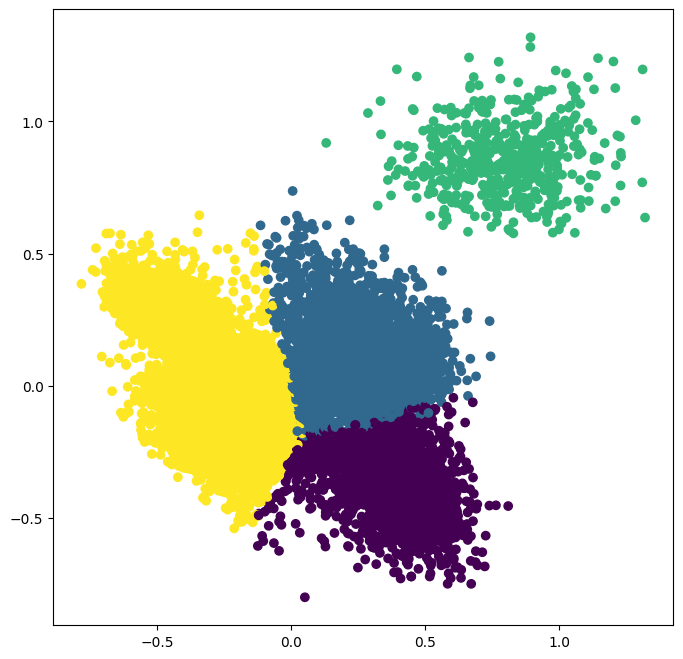

In [84]:
kmeans = KMeans(n_clusters=4, random_state=6, n_init=5) #create the model
kmeans.fit(X_scaled) #train the model
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_scaled[:,0], X_scaled[:,1],c=kmeans.labels_)

In [85]:
# Calculate silhouette score
cluster_labels = kmeans.labels_  # Getting the cluster labels
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3799902487671694


#**Hierarchial Clustering**

In [86]:
#Printing the data
final_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.111489,0.058574,0.000246,0.152142,0.122612,0.033827,0.109044,0.070804,0.671024,0.009831,0.934823,0.786733,0.593432,0.000323,0.750996,0.980620,SEKER
1,0.112821,0.077557,0.000170,0.178337,0.051577,0.019715,0.110780,0.073577,0.735504,0.009284,0.793138,0.903549,0.547447,0.000375,0.884987,0.974979,SEKER
2,0.115358,0.068035,0.000293,0.158190,0.131521,0.035147,0.112747,0.078816,0.716671,0.009930,0.914511,0.773514,0.582016,0.000310,0.736200,0.987196,SEKER
3,0.117825,0.082942,0.000270,0.177691,0.091623,0.028593,0.116675,0.083854,0.731365,0.008113,0.826871,0.829912,0.552408,0.000331,0.799846,0.893675,SEKER
4,0.118343,0.065313,0.000183,0.200679,0.025565,0.011730,0.115509,0.084906,0.700538,0.010119,0.988408,0.951583,0.510741,0.000388,0.941770,0.989116,SEKER


In [87]:
print(final_data.dtypes)

Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


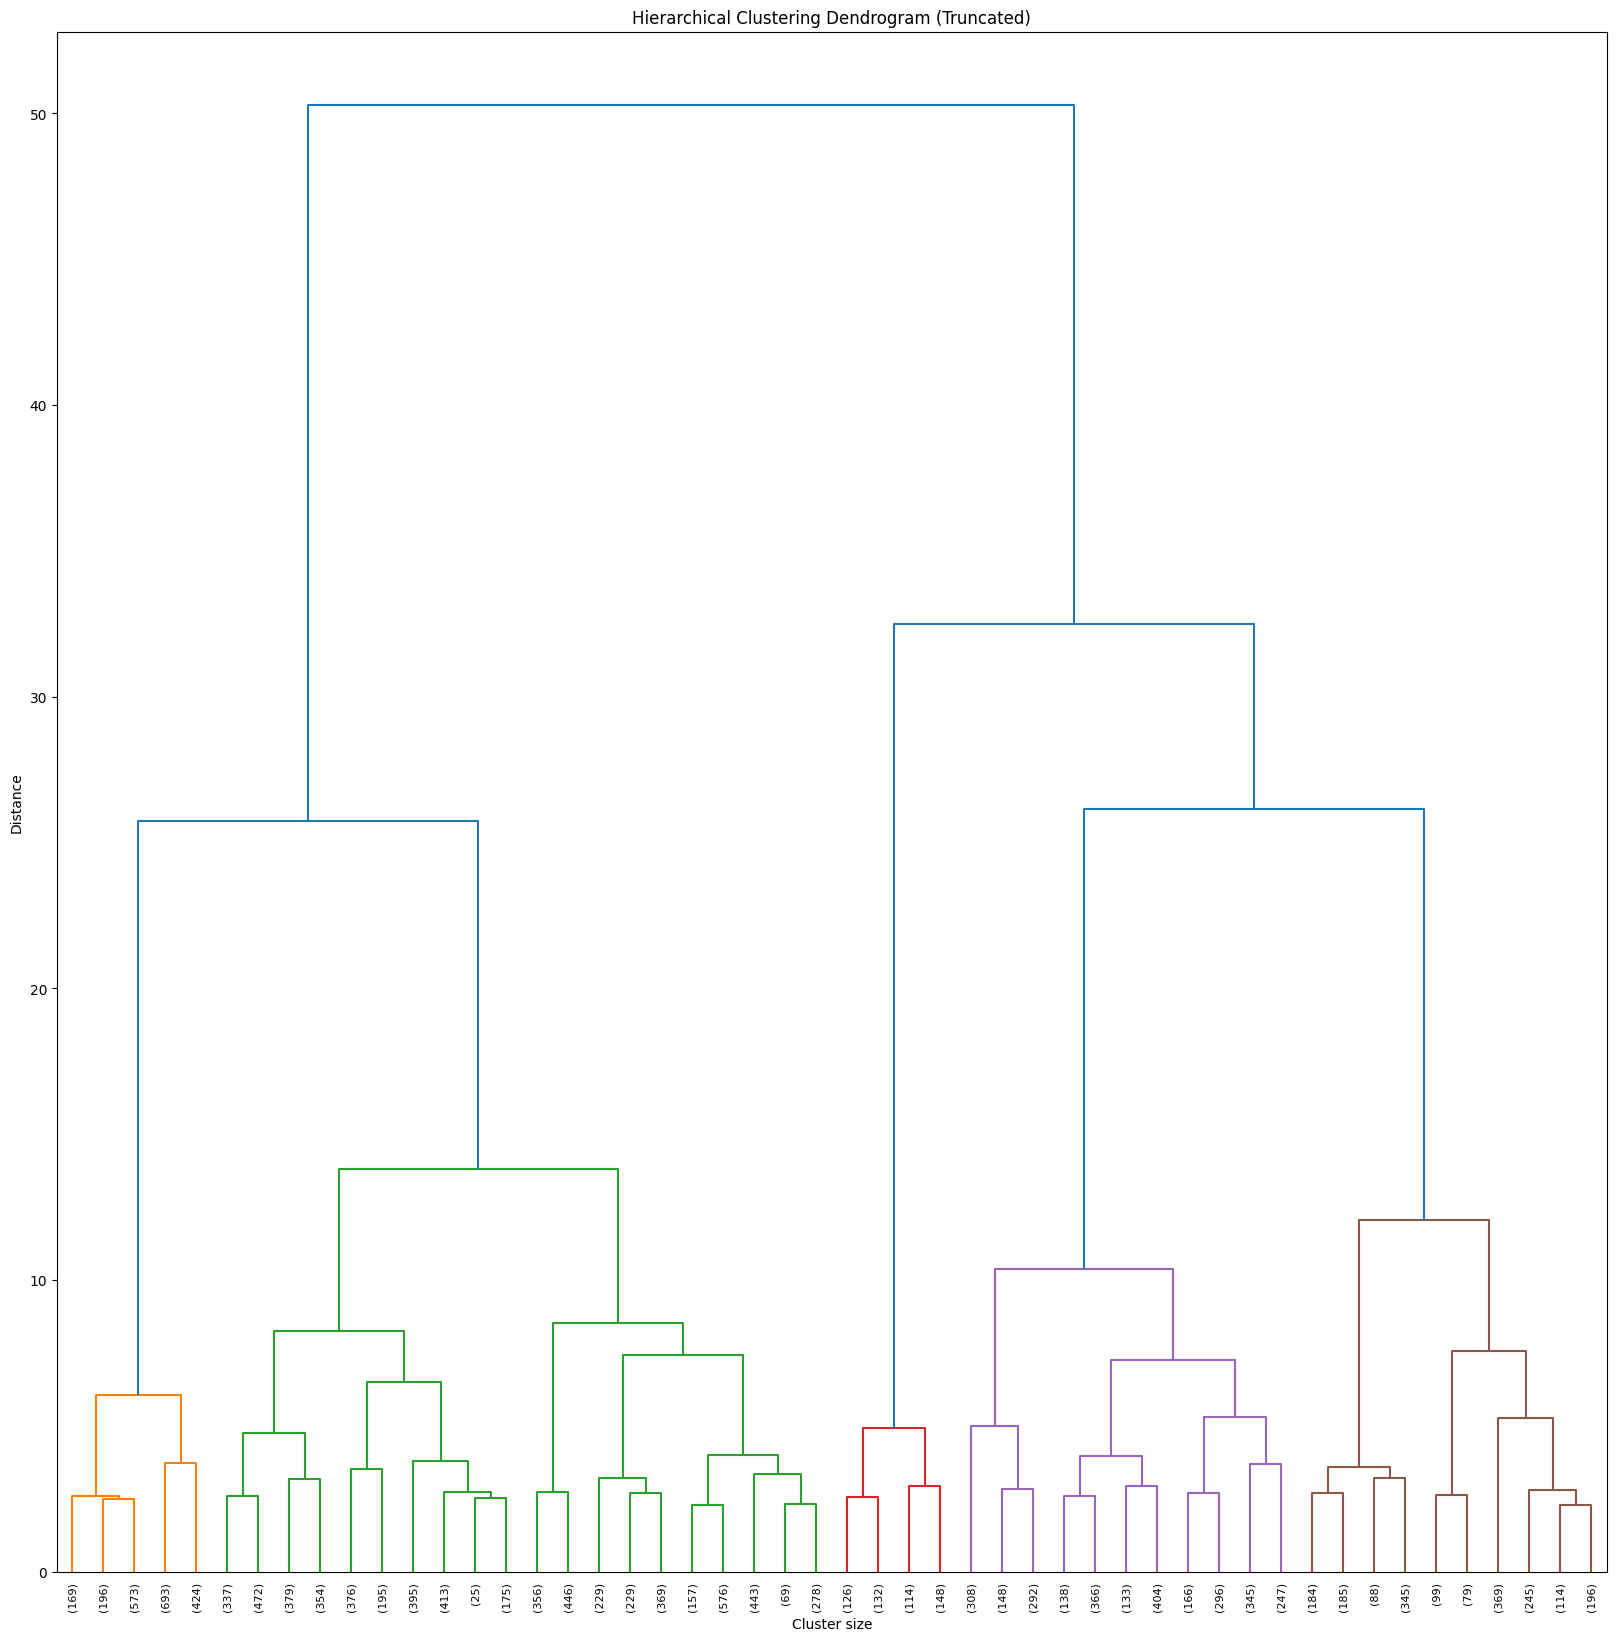

In [88]:
h_cluster = AgglomerativeClustering(n_clusters=4)

# Train the model on the scaled data
h_cluster.fit(X_scaled)

# Compute the linkage matrix
c_linkage = linkage(X_scaled, method='ward')

# Show the dendrogram with truncation
fig, ax = plt.subplots(1, 1, figsize=(20, 20)) # Increase figure size for clarity
dendrogram(
    c_linkage,
    ax=ax,
    color_threshold=20,
    truncate_mode='lastp',  # Truncate mode
    p=50,  # Show only the last 50 merged clusters
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [89]:
#Calculation of silhouette score
h_cluster_cluster_labels = h_cluster.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, h_cluster_cluster_labels)

print("Silhouette Score for Hierarchical Clustering:", silhouette_avg)

Silhouette Score for Hierarchical Clustering: 0.38744443538021944
